Targets:  
*   Add Rotation around 5 - 7 degrees
*   Add LR Scheduler


Results:  
*   Parameters: 7.5k
*   Best Train Accuracy: 99.51
*   Best Test Accuracy: 99.45

Analysis: Test accuracy is above 99.4% after use of image rotation and LR scheduler.


In [1]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Model_2, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [2]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.RandomRotation((-5.0, 5.0), fill=(0.1307,)),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

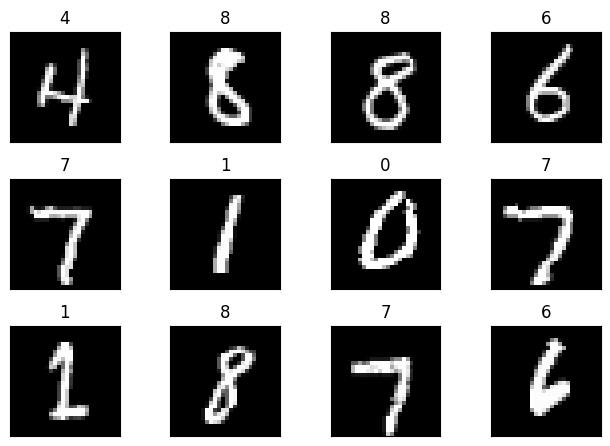

In [5]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Model_2().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
           Conv2d-13           [-1, 12, 10, 10]             864
             ReLU-14           [-1, 12,

In [7]:
num_epochs = 15
model = Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)  # large learning rate
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=num_epochs, steps_per_epoch=len(train_loader))

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=0.1658 Batch_id=468 Accuracy=83.19: 100%|██████████| 469/469 [00:25<00:00, 18.28it/s]


Test set: Average loss: 0.1259, Accuracy: 9709/10000 (97.09%)

Epoch 2


Train: Loss=0.1218 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]


Test set: Average loss: 0.0613, Accuracy: 9829/10000 (98.29%)

Epoch 3


Train: Loss=0.0136 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:21<00:00, 21.50it/s]


Test set: Average loss: 0.0420, Accuracy: 9874/10000 (98.74%)

Epoch 4


Train: Loss=0.0729 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]


Test set: Average loss: 0.0402, Accuracy: 9879/10000 (98.79%)

Epoch 5


Train: Loss=0.0258 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:22<00:00, 20.67it/s]


Test set: Average loss: 0.0328, Accuracy: 9894/10000 (98.94%)

Epoch 6


Train: Loss=0.0543 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:23<00:00, 20.12it/s]


Test set: Average loss: 0.0307, Accuracy: 9899/10000 (98.99%)

Epoch 7


Train: Loss=0.0265 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:21<00:00, 21.90it/s]


Test set: Average loss: 0.0267, Accuracy: 9920/10000 (99.20%)

Epoch 8


Train: Loss=0.0679 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:22<00:00, 20.68it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Epoch 9


Train: Loss=0.0239 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:22<00:00, 20.67it/s]


Test set: Average loss: 0.0241, Accuracy: 9920/10000 (99.20%)

Epoch 10


Train: Loss=0.0190 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]


Test set: Average loss: 0.0219, Accuracy: 9933/10000 (99.33%)

Epoch 11


Train: Loss=0.0154 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]


Test set: Average loss: 0.0203, Accuracy: 9938/10000 (99.38%)

Epoch 12


Train: Loss=0.0095 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]


Test set: Average loss: 0.0183, Accuracy: 9939/10000 (99.39%)

Epoch 13


Train: Loss=0.0195 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:22<00:00, 20.53it/s]


Test set: Average loss: 0.0181, Accuracy: 9939/10000 (99.39%)

Epoch 14


Train: Loss=0.0147 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:23<00:00, 20.04it/s]


Test set: Average loss: 0.0174, Accuracy: 9943/10000 (99.43%)

Epoch 15


Train: Loss=0.0026 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 99.51@15		99.51
test	 99.45@15		99.45


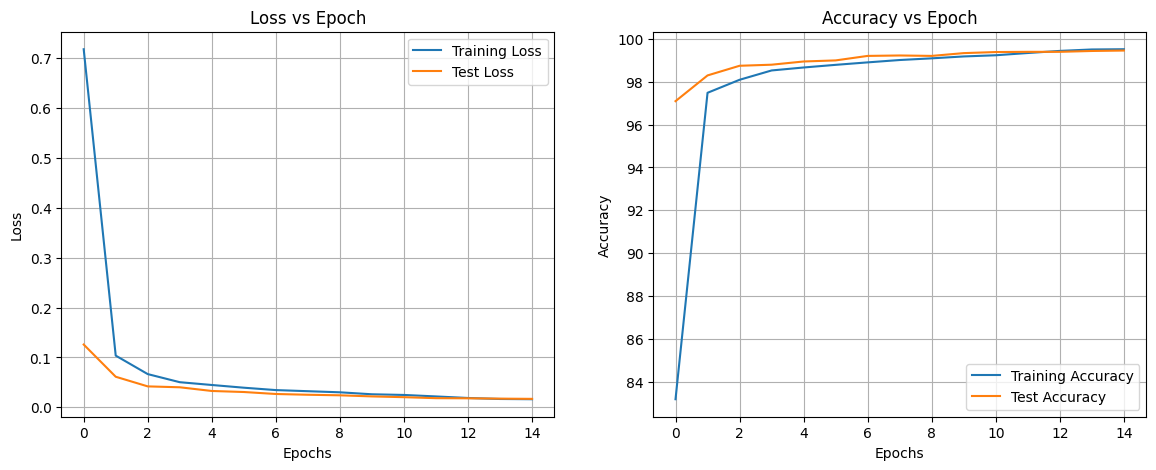

In [8]:
trainer.plot_history()

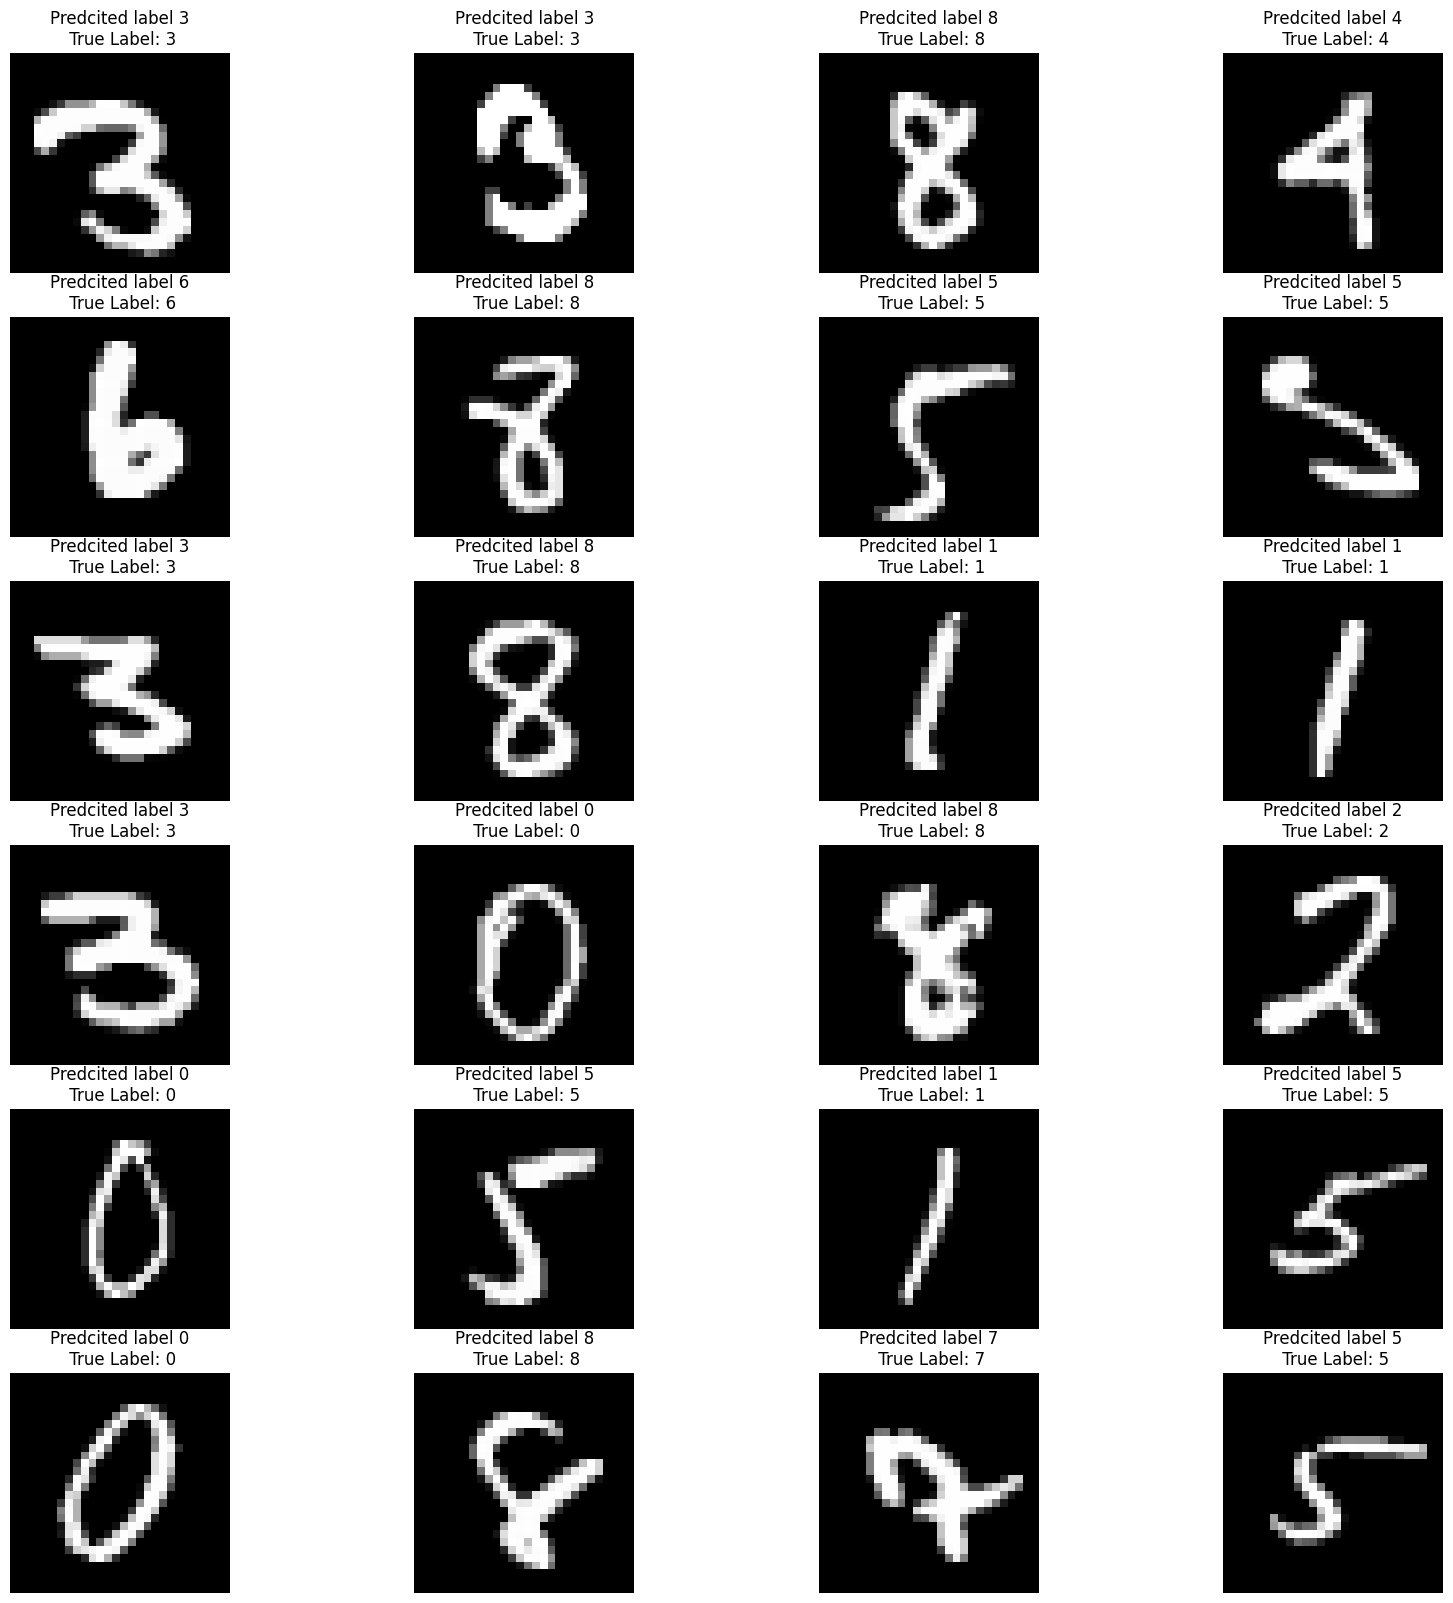

In [9]:
evaluate_model(trainer.model, test_loader, device)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
